In [ ]:
#this template is used in most of the ml concepts

#importing libraries

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
dataset = pd.read_csv("/content/delivery_time.csv")

In [4]:
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
dataset.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [6]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
dataset.head(7)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7


#independent and dependent variables

In [9]:
y = dataset.iloc[:,:-1].values
X = dataset.iloc[:,1].values


In [10]:
X

array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
        7,  2,  7,  5])

In [11]:
y

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

#Splitting the dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [13]:
X_train

array([ 8,  3,  2,  7,  7, 10,  6,  6,  6,  9,  3,  7,  9, 10,  4,  7])

In [14]:
X_test

array([10,  3,  5,  4,  4])

In [15]:
y_train

array([[19.83],
       [12.03],
       [ 8.  ],
       [19.  ],
       [17.83],
       [29.  ],
       [19.75],
       [15.35],
       [13.75],
       [18.75],
       [ 9.5 ],
       [18.11],
       [24.  ],
       [21.  ],
       [14.88],
       [16.68]])

In [16]:
y_test

array([[17.9 ],
       [11.5 ],
       [21.5 ],
       [13.5 ],
       [10.75]])

In [17]:
X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Feature Scaling Using Standard Scaler

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [19]:
X_train

array([[ 0.62554324],
       [-1.4596009 ],
       [-1.87662973],
       [ 0.20851441],
       [ 0.20851441],
       [ 1.4596009 ],
       [-0.20851441],
       [-0.20851441],
       [-0.20851441],
       [ 1.04257207],
       [-1.4596009 ],
       [ 0.20851441],
       [ 1.04257207],
       [ 1.4596009 ],
       [-1.04257207],
       [ 0.20851441]])

In [20]:
X_test

array([[ 1.93397511],
       [-0.88640526],
       [-0.0805823 ],
       [-0.48349378],
       [-0.48349378]])

In [21]:
#fitting the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
#predicting the Test set results
y_pred = regressor.predict(X_test)

In [23]:
y_test

array([[17.9 ],
       [11.5 ],
       [21.5 ],
       [13.5 ],
       [10.75]])

In [24]:
y_pred

array([[26.13487518],
       [13.31083846],
       [16.97484895],
       [15.14284371],
       [15.14284371]])

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

mae = mean_absolute_error(y_true = y_test,y_pred = y_pred)
#squared true returns MSE value,False returns RMSE value
mse = mean_squared_error(y_true = y_test,y_pred = y_pred)
rmse = mean_squared_error(y_true = y_test,y_pred = y_pred,squared = False)
mape = mean_absolute_percentage_error(y_true = y_test,y_pred = y_pred)
rsquare = r2_score(y_true = y_test,y_pred = y_pred)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("MAPE:",mape)
print("Adj.Rsquare:",rsquare)

MAE: 4.121310419596566
MSE: 22.713061675516425
RMSE: 4.765822245480461
MAPE: 0.27166279970343143
Adj.Rsquare: -0.36467240714247096


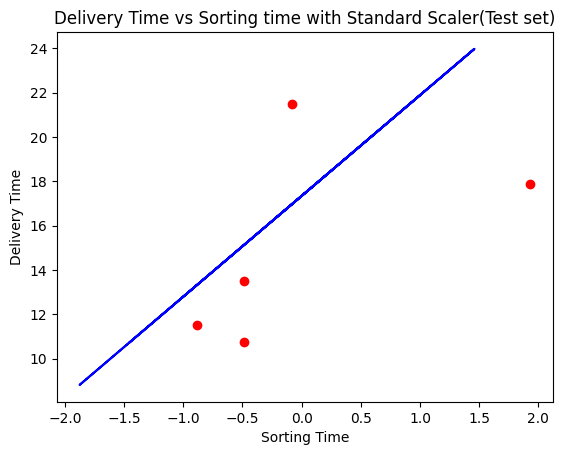

In [26]:
#visualizing the test set results
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'blue')
plt.title('Delivery Time vs Sorting time with Standard Scaler(Test set)')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

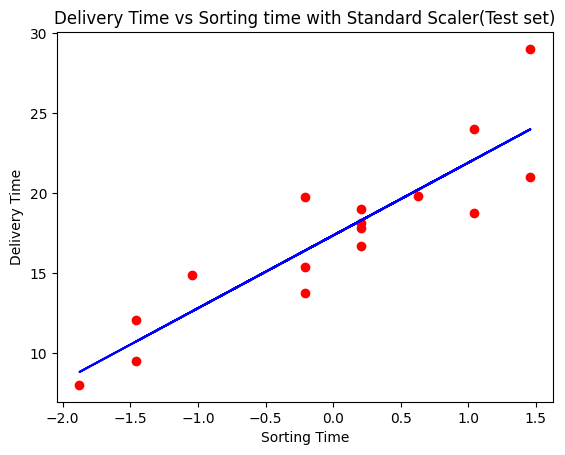

In [27]:
#visualizing the train set results
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'blue')
plt.title('Delivery Time vs Sorting time with Standard Scaler(Test set)')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

# Predicting for new data

In [28]:
newdata = pd.Series([4,9,15])
data_pred = pd.DataFrame(newdata,columns = ['Sorting Time'])
data_pred

,Sorting Time
0,4
1,9
2,15


In [29]:
regressor.predict(data_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[35.52891977],
       [58.26350697],
       [85.54501162]])

# Feature Scaling using Min Max Scaler

In [30]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
data_minmax = pd.DataFrame(min_max.fit_transform(dataset),columns = dataset.columns)
data_minmax.head()

,Delivery Time,Sorting Time
0,0.619048,1.000
1,0.261905,0.250
2,0.559524,0.500
3,0.761905,0.875
4,1.000000,1.000


In [31]:
X1 = data_minmax.iloc[:, :-1].values
y1 = data_minmax.iloc[:, 1].values

In [32]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.2, random_state=0)

In [33]:
#fitting the Algorithm
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X1_train,y1_train)

LinearRegression()

In [34]:
#predicting the Test set results
y1_pred = regressor1.predict(X1_test)

In [35]:
y1_test

array([1.   , 0.125, 0.375, 0.25 , 0.25 ])

In [36]:
y1_pred

array([0.59210758, 0.25297822, 0.78286785, 0.35895614, 0.2132365 ])

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

mae = mean_absolute_error(y_true = y1_test,y_pred = y1_pred)
#squared true returns MSE value,False returns RMSE value
mse = mean_squared_error(y_true = y1_test,y_pred = y1_pred)
rmse = mean_squared_error(y_true = y1_test,y_pred = y1_pred,squared = False)
mape = mean_absolute_percentage_error(y_true = y1_test,y_pred = y1_pred)
rsquare = r2_score(y_true = y1_test,y_pred = y1_pred)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("MAPE:",mape)
print("Adj.Rsquare:",rsquare)

MAE: 0.21789162701480316
MSE: 0.07246676573131705
RMSE: 0.2691965187949448
MAPE: 0.6204488722569591
Adj.Rsquare: 0.2470985378564462


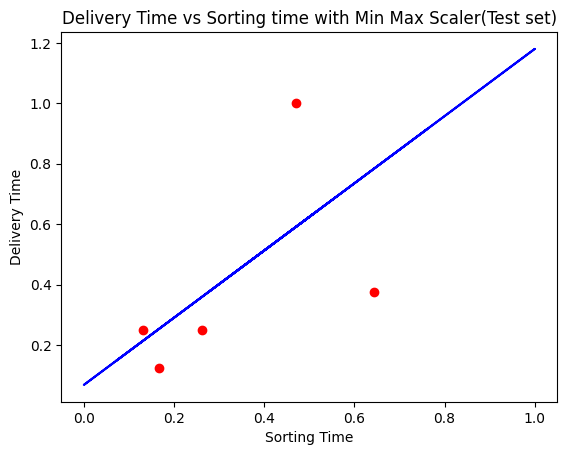

In [38]:
#visualizing the test set results
plt.scatter(X1_test,y1_test,color = 'red')
plt.plot(X1_train,regressor1.predict(X1_train),color = 'blue')
plt.title('Delivery Time vs Sorting time with Min Max Scaler(Test set)')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

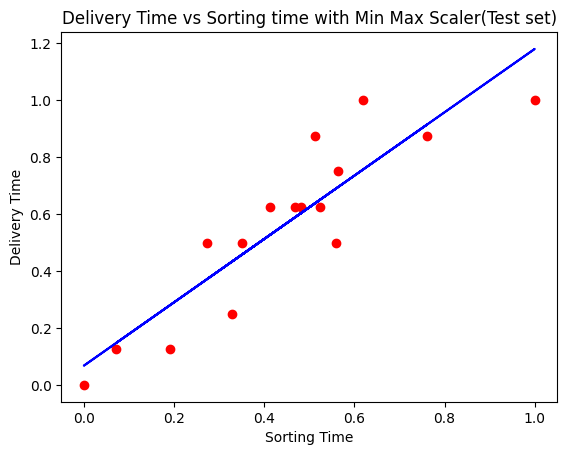

In [39]:
#visualizing the train set results
plt.scatter(X1_train,y1_train,color = 'red')
plt.plot(X1_train,regressor1.predict(X1_train),color = 'blue')
plt.title('Delivery Time vs Sorting time with Min Max Scaler(Test set)')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

# Predicting for new data

In [40]:
newdata1 = pd.Series([4,9,15])
data_pred1 = pd.DataFrame(newdata1,columns = ['Sorting Time'])
data_pred1

,Sorting Time
0,4
1,9
2,15


In [ ]:
regressor1.predict(data_pred1)

array([ 4.51858976, 10.08243091, 16.75904028])

# Feature Scaling Using Log Transformations

In [41]:
data_log = np.log(dataset)

In [42]:
data_log

,Delivery Time,Sorting Time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


Text(0.5, 1.0, 'Log-Transformed Data')

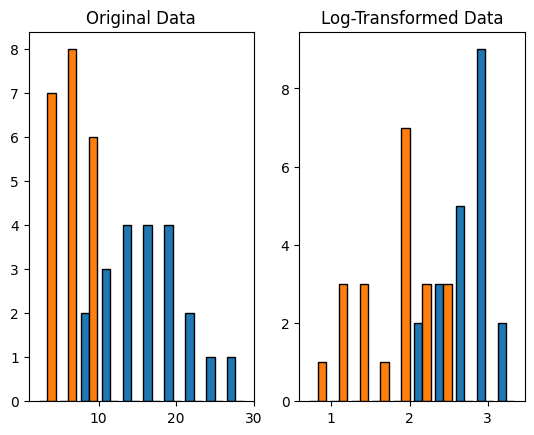

In [43]:
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

In [44]:
y2 = data_log.iloc[:,:-1].values
X2 = data_log.iloc[:,1].values


In [45]:
X2

array([2.30258509, 1.38629436, 1.79175947, 2.19722458, 2.30258509,
       1.79175947, 1.94591015, 1.09861229, 2.30258509, 2.19722458,
       2.07944154, 1.38629436, 1.94591015, 1.09861229, 1.09861229,
       1.38629436, 1.79175947, 1.94591015, 0.69314718, 1.94591015,
       1.60943791])

In [46]:
y2

array([[3.04452244],
       [2.60268969],
       [2.98315349],
       [3.17805383],
       [3.36729583],
       [2.73111547],
       [2.94443898],
       [2.2512918 ],
       [2.88480071],
       [2.93119375],
       [2.98719594],
       [2.37490575],
       [2.8142104 ],
       [2.44234704],
       [2.48740353],
       [2.70001803],
       [2.62103882],
       [2.89646427],
       [2.07944154],
       [2.88088243],
       [3.06805294]])

In [47]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size = 0.2, random_state=0)

In [48]:
X2_train= X2_train.reshape(-1, 1)
X2_test = X2_test.reshape(-1, 1)

In [49]:
#fitting the Algorithm
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(X2_train,y2_train)

LinearRegression()

In [50]:
#predicting the Test set results
y2_pred = regressor2.predict(X2_test)

In [51]:
y2_pred

array([[3.14025852],
       [2.36721191],
       [2.69520272],
       [2.55192676],
       [2.55192676]])

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

mae = mean_absolute_error(y_true = y2_test,y_pred = y2_pred)
#squared true returns MSE value,False returns RMSE value
mse = mean_squared_error(y_true = y2_test,y_pred = y2_pred)
rmse = mean_squared_error(y_true = y2_test,y_pred = y2_pred,squared = False)
mape = mean_absolute_percentage_error(y_true = y2_test,y_pred = y2_pred)
rsquare = r2_score(y_true = y2_test,y_pred = y2_pred)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("MAPE:",mape)
print("Adj.Rsquare:",rsquare)

MAE: 0.1862454154079467
MSE: 0.04876691403339787
RMSE: 0.22083232107958714
MAPE: 0.06697706182496402
Adj.Rsquare: 0.2991622522257129


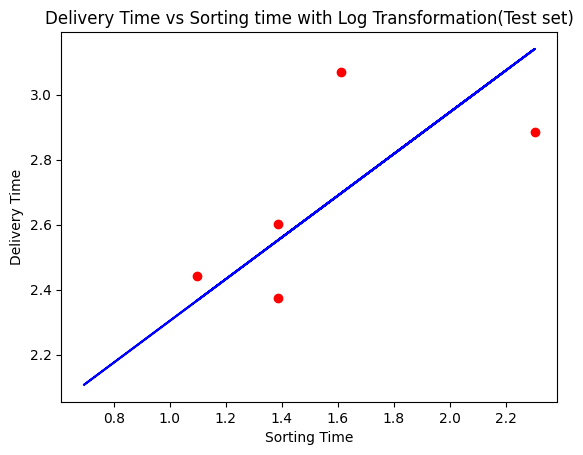

In [53]:
#visualizing the test set results
plt.scatter(X2_test,y2_test,color = 'red')
plt.plot(X2_train,regressor2.predict(X2_train),color = 'blue')
plt.title('Delivery Time vs Sorting time with Log Transformation(Test set)')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

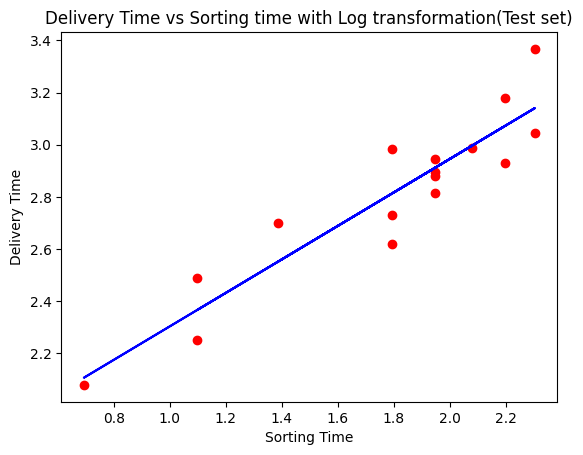

In [54]:
#visualizing the train set results
plt.scatter(X2_train,y2_train,color = 'red')
plt.plot(X2_train,regressor2.predict(X2_train),color = 'blue')
plt.title('Delivery Time vs Sorting time with Log transformation(Test set)')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [55]:
newdata2 = pd.Series([4,9,15])
data_pred2 = pd.DataFrame(newdata2,columns = ['Sorting Time'])
data_pred2

,Sorting Time
0,4
1,9
2,15


## Transformational model using square of data

In [56]:
data_sqr = np.square(dataset)

In [57]:
data_sqr.head()

,Delivery Time,Sorting Time
0,441.0000,100
1,182.2500,16
2,390.0625,36
3,576.0000,81
4,841.0000,100


In [58]:
y3 = data_sqr.iloc[:,:-1].values
X3 = data_sqr.iloc[:,1].values

In [59]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3, test_size = 0.2, random_state=0)

In [61]:
X3_train= X3_train.reshape(-1, 1)
X3_test = X3_test.reshape(-1, 1)

In [62]:
#fitting the Algorithm
from sklearn.linear_model import LinearRegression
regressor3 = LinearRegression()
regressor3.fit(X3_train,y3_train)

LinearRegression()

In [63]:
#predicting the Test set results
y3_pred = regressor3.predict(X3_test)

In [64]:
y3_pred

array([[603.21990321],
       [118.85371634],
       [204.01700195],
       [156.1126538 ],
       [156.1126538 ]])

In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

mae3 = mean_absolute_error(y_true = y3_test,y_pred = y3_pred)
#squared true returns MSE value,False returns RMSE value
mse3 = mean_squared_error(y_true = y3_test,y_pred = y3_pred)
rmse3 = mean_squared_error(y_true = y3_test,y_pred = y3_pred,squared = False)
mape3 = mean_absolute_percentage_error(y_true = y3_test,y_pred = y3_pred)
rsquare3 = r2_score(y_true = y3_test,y_pred = y3_pred)

print("MAE:",mae3)
print("MSE:",mse3)
print("RMSE:",rmse3)
print("MAPE:",mape3)
print("Adj.Rsquare:",rsquare3)

MAE: 124.2253369831933
MSE: 29834.53177817969
RMSE: 172.72675466811646
MAPE: 0.4073794577328423
Adj.Rsquare: -0.7293721625432514


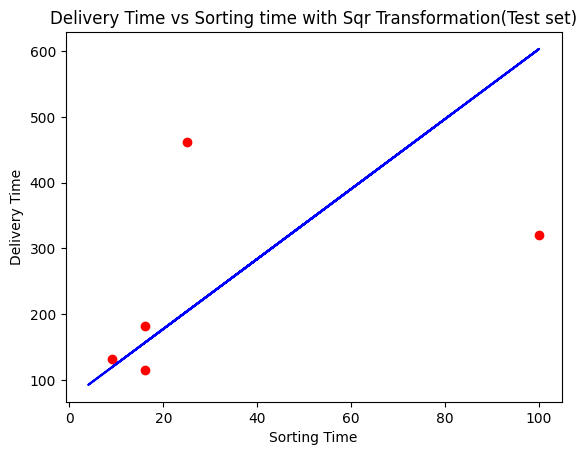

In [66]:
#visualizing the test set results
plt.scatter(X3_test,y3_test,color = 'red')
plt.plot(X3_train,regressor3.predict(X3_train),color = 'blue')
plt.title('Delivery Time vs Sorting time with Sqr Transformation(Test set)')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

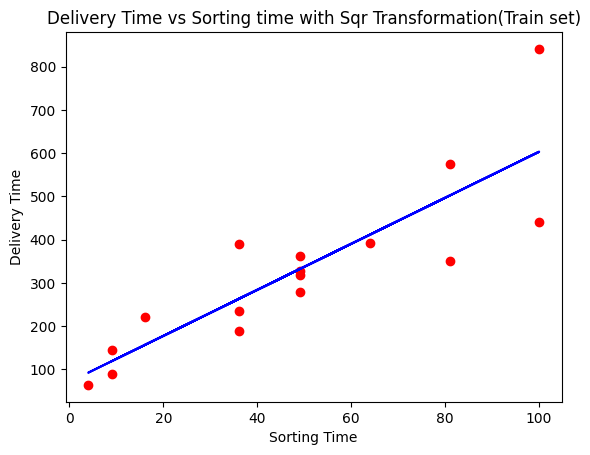

In [68]:
#visualizing the train set results
plt.scatter(X3_train,y3_train,color = 'red')
plt.plot(X3_train,regressor3.predict(X3_train),color = 'blue')
plt.title('Delivery Time vs Sorting time with Sqr Transformation(Train set)')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

## Transformational model using squareroot of data

In [69]:
data_sqrt = np.sqrt(dataset)

In [70]:
y4 = data_sqrt.iloc[:,:-1].values
X4 = data_sqrt.iloc[:,1].values

In [71]:
from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4, test_size = 0.2, random_state=0)

In [72]:
X4_train= X4_train.reshape(-1, 1)
X4_test = X4_test.reshape(-1, 1)

In [73]:
#fitting the Algorithm
from sklearn.linear_model import LinearRegression
regressor4 = LinearRegression()
regressor4.fit(X4_train,y4_train)

LinearRegression()

In [74]:
#predicting the Test set results
y4_pred = regressor4.predict(X4_test)

In [75]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

mae4 = mean_absolute_error(y_true = y4_test,y_pred = y4_pred)
#squared true returns MSE value,False returns RMSE value
mse4 = mean_squared_error(y_true = y4_test,y_pred = y4_pred)
rmse4 = mean_squared_error(y_true = y4_test,y_pred = y4_pred,squared = False)
mape4 = mean_absolute_percentage_error(y_true = y4_test,y_pred = y4_pred)
rsquare4 = r2_score(y_true = y4_test,y_pred = y4_pred)

print("MAE:",mae4)
print("MSE:",mse4)
print("RMSE:",rmse4)
print("MAPE:",mape4)
print("Adj.Rsquare:",rsquare4)

MAE: 0.3915753070476359
MSE: 0.2316285370994521
RMSE: 0.4812780247418867
MAPE: 0.09537258946019778
Adj.Rsquare: 0.13026208350530455


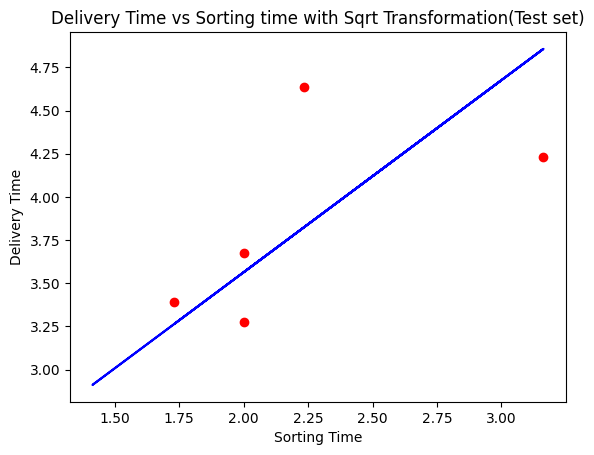

In [77]:
#visualizing the test set results
plt.scatter(X4_test,y4_test,color = 'red')
plt.plot(X4_train,regressor4.predict(X4_train),color = 'blue')
plt.title('Delivery Time vs Sorting time with Sqrt Transformation(Test set)')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

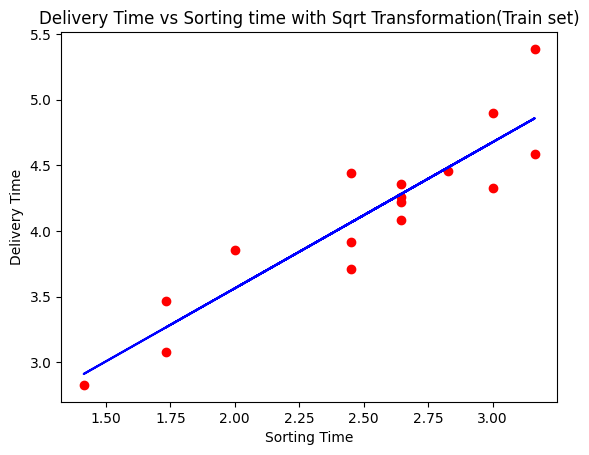

In [78]:
#visualizing the train set results
plt.scatter(X4_train,y4_train,color = 'red')
plt.plot(X4_train,regressor4.predict(X4_train),color = 'blue')
plt.title('Delivery Time vs Sorting time with Sqrt Transformation(Train set)')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

## Transformational model using cuberoot of data

In [79]:
data_cbrt = np.cbrt(dataset)

In [80]:
y5 = data_cbrt.iloc[:,:-1].values
X5 = data_cbrt.iloc[:,1].values

In [81]:
from sklearn.model_selection import train_test_split
X5_train, X5_test, y5_train, y5_test = train_test_split(X5,y5, test_size = 0.2, random_state=0)

In [82]:
X5_train= X_train.reshape(-1, 1)
X5_test = X5_test.reshape(-1, 1)

In [83]:
#fitting the Algorithm
from sklearn.linear_model import LinearRegression
regressor5 = LinearRegression()
regressor5.fit(X5_train,y5_train)

LinearRegression()

In [84]:
#predicting the Test set results
y5_pred = regressor5.predict(X5_test)

In [85]:
y5_pred

array([[3.0776053 ],
       [2.90720354],
       [2.97126139],
       [2.94193337],
       [2.94193337]])

In [86]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

mae5 = mean_absolute_error(y_true = y5_test,y_pred = y5_pred)
#squared true returns MSE value,False returns RMSE value
mse5 = mean_squared_error(y_true = y5_test,y_pred = y5_pred)
rmse5 = mean_squared_error(y_true = y5_test,y_pred = y5_pred,squared = False)
mape5 = mean_absolute_percentage_error(y_true = y5_test,y_pred = y5_pred)
rsquare5 = r2_score(y_true = y5_test,y_pred = y5_pred)

print("MAE:",mae5)
print("MSE:",mse5)
print("RMSE:",rmse5)
print("MAPE:",mape5)
print("Adj.Rsquare:",rsquare5)

MAE: 0.519625233538222
MSE: 0.3053424310122041
RMSE: 0.5525779863622908
MAPE: 0.22031478056641793
Adj.Rsquare: -5.419990087466655


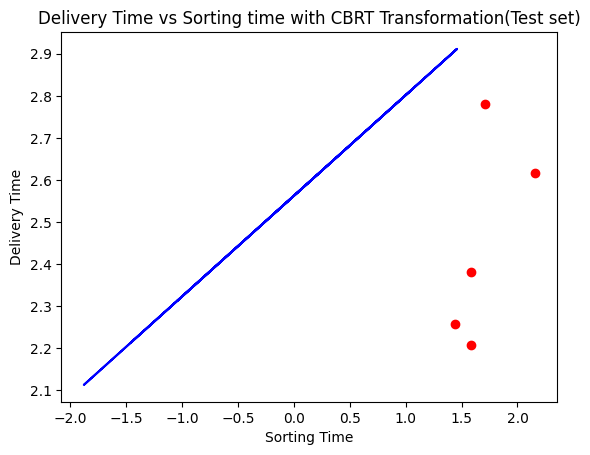

In [87]:
#visualizing the test set results
plt.scatter(X5_test,y5_test,color = 'red')
plt.plot(X5_train,regressor5.predict(X5_train),color = 'blue')
plt.title('Delivery Time vs Sorting time with CBRT Transformation(Test set)')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

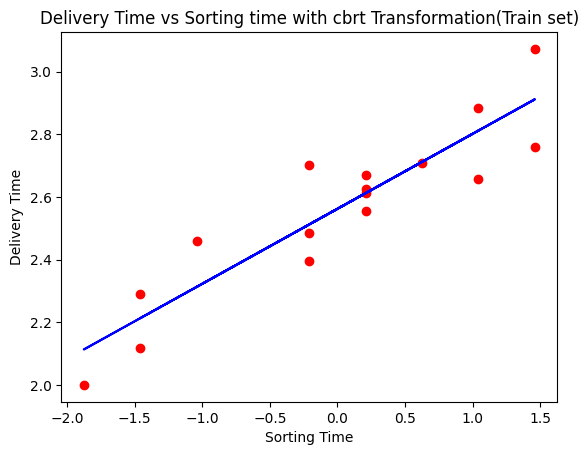

In [88]:
#visualizing the train set results
plt.scatter(X5_train,y5_train,color = 'red')
plt.plot(X5_train,regressor5.predict(X5_train),color = 'blue')
plt.title('Delivery Time vs Sorting time with cbrt Transformation(Train set)')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()